<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/2_Regresja/5_Regresja_wielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Regresja wielomianowa
1. [Import bibliotek](#0)
2. [Polynomial Regression - Regresja Wielomianowa](#1)
3. [Wygenerowanie danych](#2)
4. [Model liniowy](#3)
5. [Ekstrakcja cech wielomianowych - stopień 2](#4)
6. [Dopasowanie modelu](#5)
7. [Ekstrakcja cech wielomianowych - stopień 3](#6)
8. [Dopasowanie modelu](#7)
9. [Porównanie metryk](#8)

### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set(font_scale=1.3)
np.printoptions(precision=6, supress=True)
np.random.seed(42)

### <a name='1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

### Rozważmy model regresji liniowej: $Y=w_0+w_1X_1$

### <a name='2'></a> Wygenerowanie danych

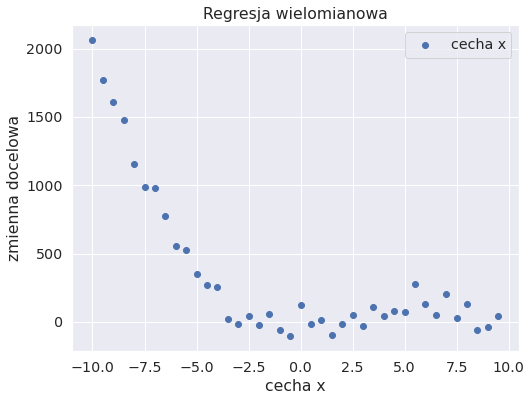

In [2]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

### <a name='3'></a> Model liniowy

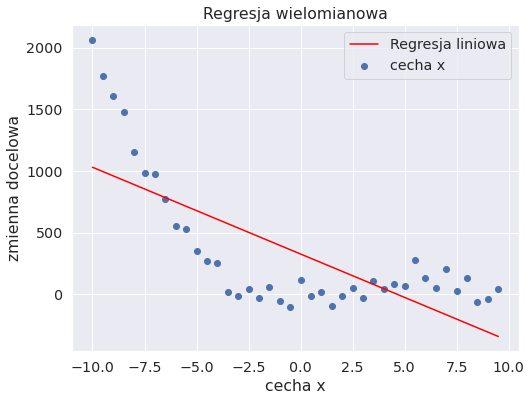

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, color='red', label='Regresja liniowa')
plt.legend()
plt.show()

In [4]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu dla naszego problemu.

Rozważmy model regresji liniowej:
$$Y = w_0 + w_1 X_1$$
Dodając cechy wielomianowe otrzymujemy:
$$Y = w_0 + w_1 X_1 +w_2X_1^2 $$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$Z = [1, X_1, X_1^2]$$
Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
$$Y = w_0 + w_1 Z_1 + w_2 Z_2$$

###  <a name='4'></a> Ekstrakcja cech wielomianowych - stopień 2

In [12]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head()

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [15]:
X_poly.shape

(40, 3)

In [16]:
df = pd.DataFrame(data=X_poly)
df.columns = ['1', 'X', 'X^2']
df.head()

,1,X,X^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00


###  <a name='5'></a> Dopasowanie modelu

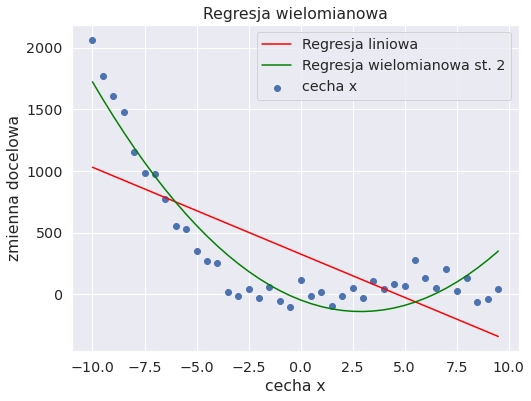

In [21]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, color='red', label='Regresja liniowa')
plt.plot(X, y_pred_2, color='green', label='Regresja wielomianowa st. 2')
plt.legend()
plt.show()

In [23]:
r2_score(y, y_pred_2)

0.8951163003458433

###  <a name='6'></a> Ekstrakcja cech wielomianowych - stopień 3

In [24]:
poly = PolynomialFeatures(degree=3)

X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[ 1.00000e+00, -1.00000e+01,  1.00000e+02, -1.00000e+03],
       [ 1.00000e+00, -9.50000e+00,  9.02500e+01, -8.57375e+02],
       [ 1.00000e+00, -9.00000e+00,  8.10000e+01, -7.29000e+02],
       [ 1.00000e+00, -8.50000e+00,  7.22500e+01, -6.14125e+02],
       [ 1.00000e+00, -8.00000e+00,  6.40000e+01, -5.12000e+02],
       [ 1.00000e+00, -7.50000e+00,  5.62500e+01, -4.21875e+02],
       [ 1.00000e+00, -7.00000e+00,  4.90000e+01, -3.43000e+02],
       [ 1.00000e+00, -6.50000e+00,  4.22500e+01, -2.74625e+02],
       [ 1.00000e+00, -6.00000e+00,  3.60000e+01, -2.16000e+02],
       [ 1.00000e+00, -5.50000e+00,  3.02500e+01, -1.66375e+02],
       [ 1.00000e+00, -5.00000e+00,  2.50000e+01, -1.25000e+02],
       [ 1.00000e+00, -4.50000e+00,  2.02500e+01, -9.11250e+01],
       [ 1.00000e+00, -4.00000e+00,  1.60000e+01, -6.40000e+01],
       [ 1.00000e+00, -3.50000e+00,  1.22500e+01, -4.28750e+01],
       [ 1.00000e+00, -3.00000e+00,  9.00000e+00, -2.70000e+01],
       [ 1.00000e+00, -2.

###  <a name='7'></a> Dopasowanie modelu

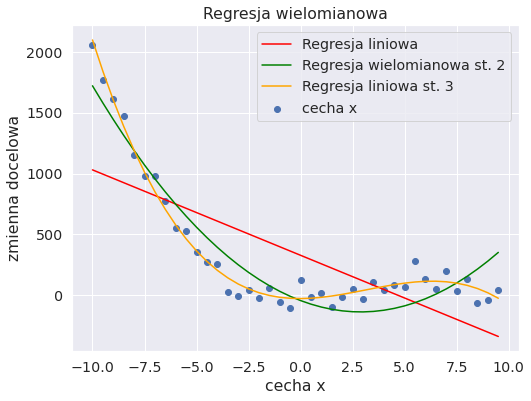

In [26]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, color='red', label='Regresja liniowa')
plt.plot(X, y_pred_2, color='green', label='Regresja wielomianowa st. 2')
plt.plot(X, y_pred_3, color='orange', label='Regresja liniowa st. 3')
plt.legend()
plt.show()

In [27]:
r2_score(y, y_pred_3)

0.9841708613657418

###  <a name='8'></a> Porównanie metryk

In [28]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [35]:
results = pd.DataFrame(data={
    'name': ['Regresja liniowa', 'Regresja wielomianowa st. 2', 'Regresja wielomianowa st. 3'],
    'R2 score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]
})
results

,name,R2 score,mae,mse,rmse
0,Regresja liniowa,0.534282,316.267126,143775.153332,379.176942
1,Regresja wielomianowa st. 2,0.895116,155.977929,32379.421866,179.942829
2,Regresja wielomianowa st. 3,0.984171,57.572030,4886.730343,69.905152


In [36]:
px.bar(data_frame=results, x='name', y='R2 score', width=700, title='Regresja liniowa - R2 score')

In [37]:
px.bar(data_frame=results, x='name', y='mae', width=700, title='Regresja liniowa - MAE')

In [38]:
px.bar(data_frame=results, x='name', y='mse', width=700, title='Regresja liniowa - MSE')

In [39]:
px.bar(data_frame=results, x='name', y='rmse', width=700, title='Regresja liniowa - RMSE')